In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import meshplot as mp
import gudhi                 as gd
from tqdm                    import tqdm
from gudhi.tensorflow        import LowerStarSimplexTreeLayer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from mapper import MapperComplex

## Utils for importing shapes

In [2]:
def off2numpy(shape_name):
    with open(shape_name, 'r') as S:
        S.readline()
        num_vertices, num_faces, _ = [int(n) for n in S.readline().split(' ')]
        info = S.readlines()
    vertices = np.array([[float(coord) for coord in l.split(' ')] for l in info[0:num_vertices]])
    faces    = np.array([[int(coord) for coord in l.split(' ')[1:]] for l in info[num_vertices:]])
    return vertices, faces

## Human

In [3]:
path=r"/Users/ziyad/Desktop/LabeledDB_new/"
vertices, faces = off2numpy(path + 'Human/10.off')
mp.plot(vertices,faces);

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.035629…

In [29]:
n_clusters=3
n_intervals=np.array([25])
gain=np.array([0.3])

kmeans=KMeans(n_clusters=n_clusters)

params=tf.Variable(initial_value=np.array([[1],[1],[1]]).astype(np.float32)/np.sqrt(3),trainable=True)
X=tf.Variable(initial_value=vertices.astype(np.float32), trainable=False)

lr = tf.keras.optimizers.schedules.InverseTimeDecay(initial_learning_rate=5e-2, decay_steps=10, decay_rate=.01)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr)

In [30]:
f=tf.tensordot(X,params,axes=1)
mapper=MapperComplex(colors=f.numpy(),filters=f.numpy(),resolutions=n_intervals, gains=gain, clustering=kmeans)
mapper.fit(vertices)
nt=mapper.get_pyvis()
nt.show('human_initial.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [31]:
losses, dgms = [], []

for epoch in tqdm(range(200+1)):
    
    with tf.GradientTape() as tape:
        f=tf.tensordot(X,params,axes=1)
        mapper=MapperComplex(colors=f.numpy(),filters=f.numpy(),resolutions=n_intervals, gains=gain, clustering=kmeans)
        mapper.fit(vertices)
        layer = LowerStarSimplexTreeLayer(simplextree=mapper.simplex_tree, homology_dimensions=[0])
        indices=[node['indices'] for node in mapper.node_info.values()]
        f_values=[tf.reshape(tf.math.reduce_mean(tf.gather(f,ind)),(1,1)) for ind in indices]
        filtration=tf.concat(f_values,0)
        dgm = layer.call(filtration)[0][0]
        
        regularization = tf.math.square(tf.norm(params)-1)
        
        # Opposite of the squared distances to the diagonal 
        loss = -tf.math.reduce_sum(tf.math.abs((dgm[:,1]-dgm[:,0])))+regularization
    gradients = tape.gradient(loss, [params])
    
    # We also apply a small random noise to the gradient to ensure convergence 
    # np.random.seed(epoch)
    # gradients[0] = gradients[0] + np.random.normal(loc=0., scale=.001, size=gradients[0].shape)
    
    optimizer.apply_gradients(zip(gradients, [params]))
    losses.append(loss.numpy())
    dgms.append(dgm)

100%|█████████████████████████████████████████| 201/201 [03:25<00:00,  1.02s/it]


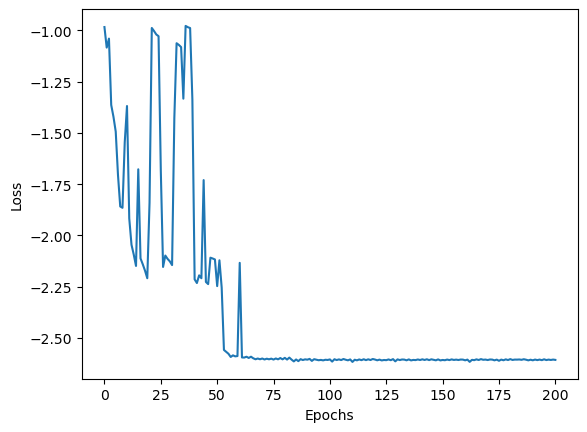

In [32]:
plt.figure()
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [35]:
params

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[0.10824162],
       [1.8961955 ],
       [0.01424456]], dtype=float32)>

In [33]:
tf.norm(params)

<tf.Tensor: shape=(), dtype=float32, numpy=1.899336>

In [34]:
mapper=MapperComplex(colors=f.numpy(),filters=f.numpy(),resolutions=n_intervals, gains=gain, clustering=kmeans)
mapper.fit(vertices)
nt=mapper.get_pyvis()
nt.show('human_final.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


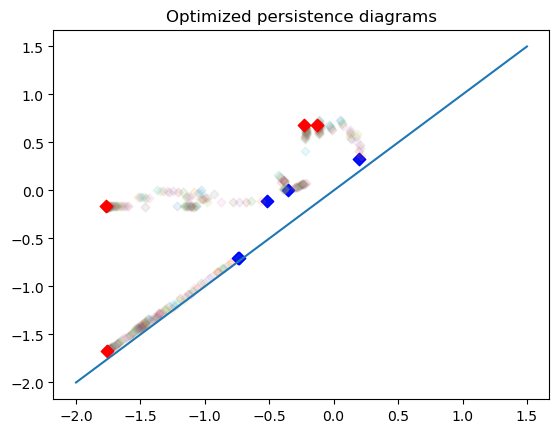

In [36]:
plt.figure()
plt.scatter(dgms[0][:,0], dgms[0][:,1], s=40, marker='D', c='blue')
for dg in dgms[:-1]:
    plt.scatter(dg[:,0], dg[:,1], s=20, marker='D', alpha=0.1)
plt.scatter(dgms[-1][:,0], dgms[-1][:,1], s=40, marker='D', c='red')
plt.plot([-2,1.5], [-2,1.5])
plt.title('Optimized persistence diagrams')
plt.show()

## Octopus

In [85]:
path=r"/Users/ziyad/Desktop/LabeledDB_new/"
vertices, faces = off2numpy(path + 'Octopus/132.off')
mp.plot(vertices,faces);

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0087004…

In [86]:
n_clusters=8
n_intervals=np.array([10])
gain=np.array([0.3])

kmeans=KMeans(n_clusters=n_clusters)

params=tf.Variable(initial_value=np.array([[1],[1],[1]]).astype(np.float32)/np.sqrt(3),trainable=True)
X=tf.Variable(initial_value=vertices.astype(np.float32), trainable=False)

lr = tf.keras.optimizers.schedules.InverseTimeDecay(initial_learning_rate=1e-0, decay_steps=10, decay_rate=.01)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr)

In [87]:
f=tf.tensordot(X,params,axes=1)
mapper=MapperComplex(colors=f.numpy(),filters=f.numpy(),resolutions=n_intervals, gains=gain, clustering=kmeans)
mapper.fit(vertices)
nt=mapper.get_pyvis()
nt.show('octopus_initial.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [72]:
losses, dgms = [], []

for epoch in tqdm(range(200+1)):
    
    with tf.GradientTape() as tape:
        f=tf.tensordot(X,params,axes=1)
        mapper=MapperComplex(colors=f.numpy(),filters=f.numpy(),resolutions=n_intervals, gains=gain, clustering=kmeans)
        mapper.fit(vertices)
        layer = LowerStarSimplexTreeLayer(simplextree=mapper.simplex_tree, homology_dimensions=[0])
        indices=[node['indices'] for node in mapper.node_info.values()]
        f_values=[tf.reshape(tf.math.reduce_mean(tf.gather(f,ind)),(1,1)) for ind in indices]
        filtration=tf.concat(f_values,0)
        dgm = layer.call(filtration)[0][0]
        
        regularization = tf.math.square(tf.norm(params)-1)
        
        # Opposite of the squared distances to the diagonal 
        loss = -tf.math.reduce_sum(tf.math.abs((dgm[:,1]-dgm[:,0])))+regularization
    gradients = tape.gradient(loss, [params])
    
    # We also apply a small random noise to the gradient to ensure convergence 
    # np.random.seed(epoch)
    # gradients[0] = gradients[0] + np.random.normal(loc=0., scale=.001, size=gradients[0].shape)
    
    optimizer.apply_gradients(zip(gradients, [params]))
    losses.append(loss.numpy())
    dgms.append(dgm)

100%|█████████████████████████████████████████| 201/201 [03:21<00:00,  1.00s/it]


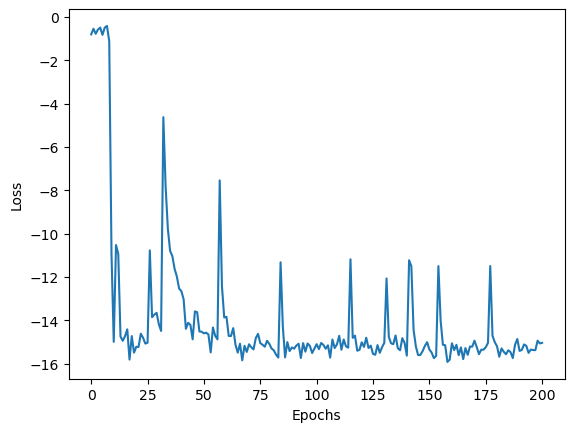

In [73]:
plt.figure()
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [74]:
params

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.1496345],
       [ 0.1455728],
       [-3.9683893]], dtype=float32)>

In [75]:
tf.norm(params)

<tf.Tensor: shape=(), dtype=float32, numpy=3.9738767>

In [76]:
mapper=MapperComplex(colors=f.numpy(),filters=f.numpy(),resolutions=n_intervals, gains=gain, clustering=kmeans)
mapper.fit(vertices)
nt=mapper.get_pyvis()
nt.show('octopus_final.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


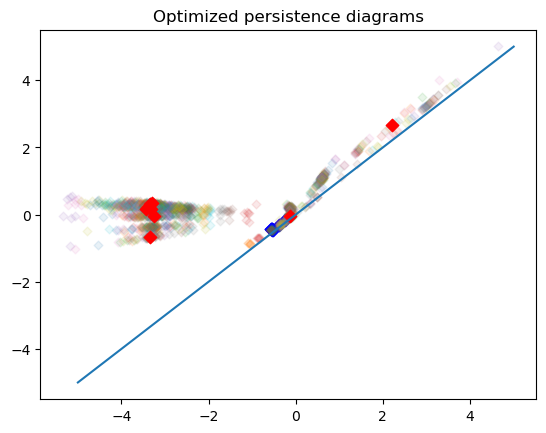

In [79]:
plt.figure()
plt.scatter(dgms[0][:,0], dgms[0][:,1], s=40, marker='D', c='blue')
for dg in dgms[:-1]:
    plt.scatter(dg[:,0], dg[:,1], s=20, marker='D', alpha=0.1)
plt.scatter(dgms[-1][:,0], dgms[-1][:,1], s=40, marker='D', c='red')
plt.plot([-5,5], [-5,5])
plt.title('Optimized persistence diagrams')
plt.show()

## Table

In [88]:
path=r"/Users/ziyad/Desktop/LabeledDB_new/"
vertices, faces = off2numpy(path + 'Table/150.off')
mp.plot(vertices,faces);

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0016575…

In [101]:
n_clusters=3
n_intervals=np.array([25])
gain=np.array([0.3])

kmeans=KMeans(n_clusters=n_clusters)

params=tf.Variable(initial_value=np.array([[1],[1],[1]]).astype(np.float32)/np.sqrt(3),trainable=True)
X=tf.Variable(initial_value=vertices.astype(np.float32), trainable=False)

lr = tf.keras.optimizers.schedules.InverseTimeDecay(initial_learning_rate=1e-1, decay_steps=10, decay_rate=.1)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr)

In [102]:
f=tf.tensordot(X,params,axes=1)
mapper=MapperComplex(colors=f.numpy(),filters=f.numpy(),resolutions=n_intervals, gains=gain, clustering=kmeans)
mapper.fit(vertices)
nt=mapper.get_pyvis()
nt.show('table_initial.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [103]:
losses, dgms = [], []

for epoch in tqdm(range(200+1)):
    
    with tf.GradientTape() as tape:
        f=tf.tensordot(X,params,axes=1)
        mapper=MapperComplex(colors=f.numpy(),filters=f.numpy(),resolutions=n_intervals, gains=gain, clustering=kmeans)
        mapper.fit(vertices)
        layer = LowerStarSimplexTreeLayer(simplextree=mapper.simplex_tree, homology_dimensions=[0])
        indices=[node['indices'] for node in mapper.node_info.values()]
        f_values=[tf.reshape(tf.math.reduce_mean(tf.gather(f,ind)),(1,1)) for ind in indices]
        filtration=tf.concat(f_values,0)
        dgm = layer.call(filtration)[0][0]
        
        regularization = tf.math.square(tf.norm(params)-1)
        
        # Opposite of the squared distances to the diagonal 
        loss = -tf.math.reduce_sum(tf.math.abs((dgm[:,1]-dgm[:,0])))+regularization
    gradients = tape.gradient(loss, [params])
    
    # We also apply a small random noise to the gradient to ensure convergence 
    # np.random.seed(epoch)
    # gradients[0] = gradients[0] + np.random.normal(loc=0., scale=.001, size=gradients[0].shape)
    
    optimizer.apply_gradients(zip(gradients, [params]))
    losses.append(loss.numpy())
    dgms.append(dgm)

100%|█████████████████████████████████████████| 201/201 [13:41<00:00,  4.09s/it]


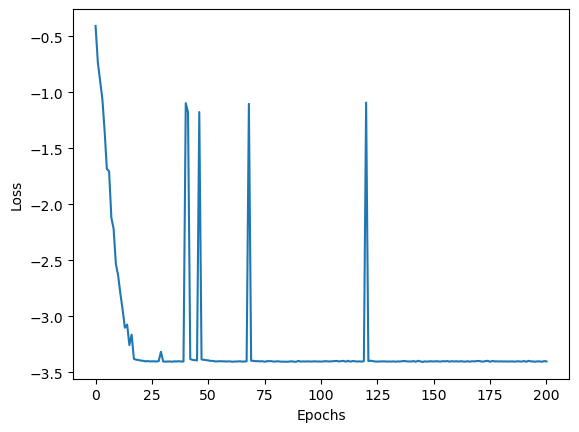

In [104]:
plt.figure()
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [105]:
params

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.6818220e-02],
       [ 2.0997941e+00],
       [-5.9954993e-05]], dtype=float32)>

In [106]:
tf.norm(params)

<tf.Tensor: shape=(), dtype=float32, numpy=2.0998614>

In [107]:
mapper=MapperComplex(colors=f.numpy(),filters=f.numpy(),resolutions=n_intervals, gains=gain, clustering=kmeans)
mapper.fit(vertices)
nt=mapper.get_pyvis()
nt.show('table_final.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


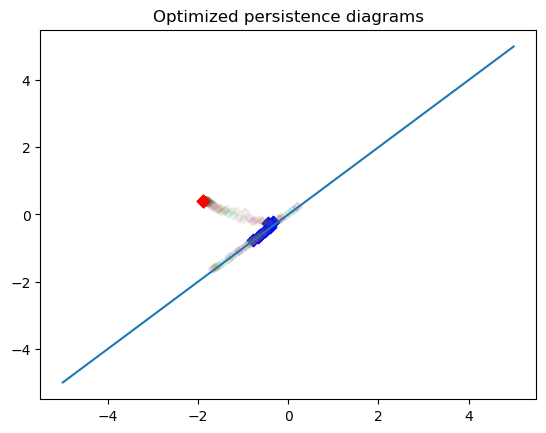

In [108]:
plt.figure()
plt.scatter(dgms[0][:,0], dgms[0][:,1], s=40, marker='D', c='blue')
for dg in dgms[:-1]:
    plt.scatter(dg[:,0], dg[:,1], s=20, marker='D', alpha=0.1)
plt.scatter(dgms[-1][:,0], dgms[-1][:,1], s=40, marker='D', c='red')
plt.plot([-5,5], [-5,5])
plt.title('Optimized persistence diagrams')
plt.show()